In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display

import os


from typing import List, Tuple

44100


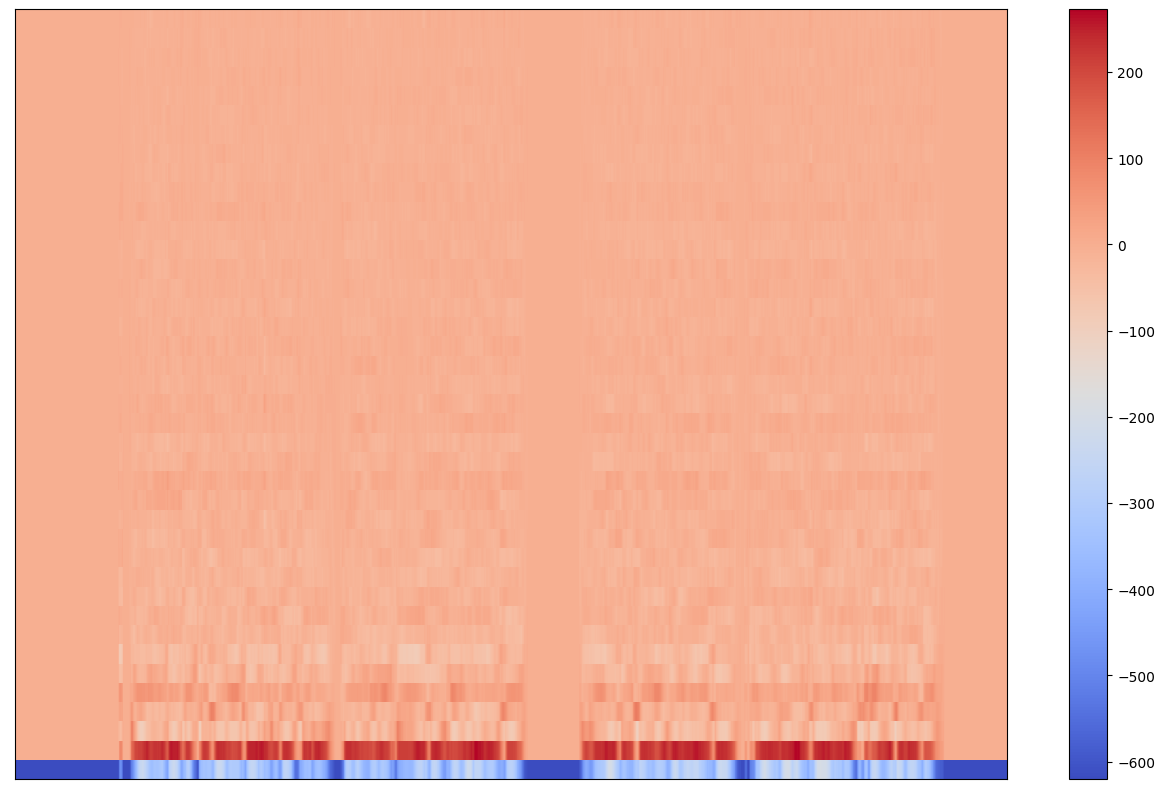

In [2]:
y1 , sr = librosa.load('./data/남자3.wav', sr=None)
print(sr)
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr, n_mfcc=40, hop_length = 128)
plt.figure(figsize=(16,10))

librosa.display.specshow(mfcc1,sr=sr, hop_length=128)
plt.colorbar()

## audio split

In [3]:
class AudioDataset:

    def __init__(self, dir_path, split_sec, sr) -> None:
        self.dir_path = dir_path
        self.split_sec = split_sec
        self.sr = sr
        self.x, self.y = self.preprocessing()

    def __len__(self) -> int:
        return self.x

    def __getitem__(self, index) -> Tuple[list,list]:
        return self.x[index], self.y[index]

    def getAll(self) -> Tuple[list,list]:
        return self.x, self.y

    def preprocessing(self) -> Tuple[list, list]:
        # file load
        raw_x = []
        raw_y = []
        for file in os.listdir('data'):
            label = file.split('.')[0]
            y , _ = librosa.load(f"./data/{file}", sr=self.sr)
            for x in range(0,math.ceil(len(y)/self.sr)-2, self.split_sec): #split_sec
                raw_x.append(y[x:x+2*self.sr])
                raw_y.append(label)
        
        # mfcc
        mfcc_x = []
        for data in raw_x:
            mfcc_x.append(librosa.feature.mfcc(y=data, sr=self.sr, n_mfcc=40, hop_length=128))

        return mfcc_x, raw_y

In [4]:
data_x, data_y = AudioDataset('./data', 2, 16000).getAll()

In [5]:
# check
for x in range(len(data_x)):
    print(np.shape(data_x[x]), data_y[x])

(40, 251) 남자1
(40, 251) 남자1
(40, 251) 남자1
(40, 251) 남자1
(40, 251) 남자1
(40, 251) 남자1
(40, 251) 남자1
(40, 251) 남자1
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자2
(40, 251) 남자3
(40, 251) 남자3
(40, 251) 남자3
(40, 251) 남자3
(40, 251) 남자4
(40, 251) 남자4
(40, 251) 남자4
(40, 251) 남자4
(40, 251) 남자4
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 남자5
(40, 251) 여자1
(40, 251) 여자1
(40, 251) 여자1
(40, 251) 여자1
(40, 251) 여자1
(40, 251) 여자1
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 251) 여자2
(40, 2

## GMM

In [100]:
np.array(data_x).reshape(len(data_y), 40*251)

array([[-5.4657526e+02, -5.2921210e+02, -4.9872589e+02, ...,
        -1.5856142e+00, -3.0677211e-01,  2.3199230e-01],
       [-5.4564484e+02, -5.2855670e+02, -4.9823407e+02, ...,
         3.2382119e-01,  1.4776416e+00,  1.8809221e+00],
       [-5.4489001e+02, -5.2794763e+02, -4.9774249e+02, ...,
        -3.3904672e-01,  6.3007593e-01,  9.7580647e-01],
       ...,
       [-6.1037390e+02, -5.9273566e+02, -5.6302905e+02, ...,
         8.4311142e+00,  9.3386240e+00,  9.7095966e+00],
       [-6.0957214e+02, -5.9209894e+02, -5.6257501e+02, ...,
         8.2782173e+00,  9.0546370e+00,  9.5111294e+00],
       [-6.0882202e+02, -5.9147852e+02, -5.6211560e+02, ...,
         7.4389181e+00,  8.6209841e+00,  9.4490471e+00]], dtype=float32)

In [102]:
from sklearn.mixture import GaussianMixture
data_df = pd.DataFrame(np.array(data_x).reshape(len(data_y), 40*251),data_y).reset_index()
gmm = GaussianMixture(n_components=10, random_state=42)
gmm_labels = gmm.fit_predict(data_df.iloc[:,1:])
data_df['cluster'] = gmm_labels

print(data_df.groupby('index')['cluster'].value_counts())

In [96]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

# GMM 적용
from sklearn.mixture import GaussianMixture
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(iris.data)

# GMM 후 클러스터링 레이블을 따로 설정
irisDF['gmm_cluster'] = gmm_labels

# 실제 레이블과 GMM 클러스터링 후 레이블과 비교해보기(두 레이블 수치가 동일해야 똑같은 레이블 의미 아님!)
print(irisDF.groupby('target')['gmm_cluster'].value_counts())
 


target  gmm_cluster
0       1              50
1       2              45
        0               5
2       0              50
Name: gmm_cluster, dtype: int64



GMM covariances

Demonstration of several covariances types for Gaussian mixture models.

See :ref:`gmm` for more information on the estimator.

Although GMM are often used for clustering, we can compare the obtained
clusters with the actual classes from the dataset. We initialize the means
of the Gaussians with the means of the classes from the training set to make
this comparison valid.

We plot predicted labels on both training and held out test data using a
variety of GMM covariance types on the iris dataset.
We compare GMMs with spherical, diagonal, full, and tied covariance
matrices in increasing order of performance. Although one would
expect full covariance to perform best in general, it is prone to
overfitting on small datasets and does not generalize well to held out
test data.

On the plots, train data is shown as dots, while test data is shown as
crosses. The iris dataset is four-dimensional. Only the first two
dimensions are shown here, and thus some points are separated 

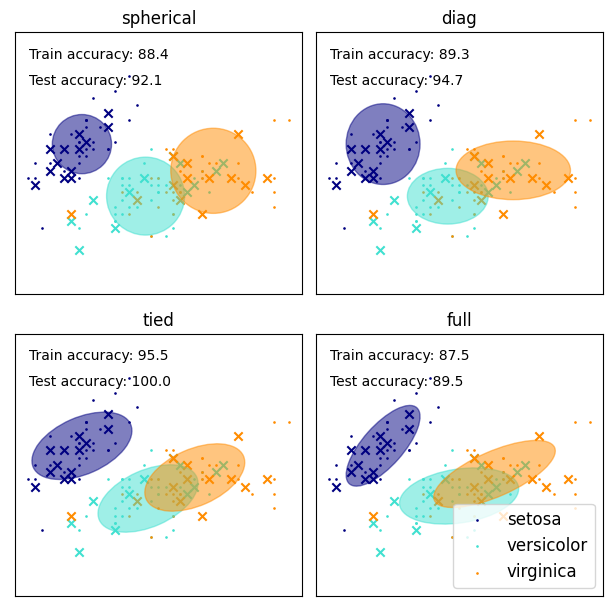

In [6]:
"""
===============
GMM covariances
===============

Demonstration of several covariances types for Gaussian mixture models.

See :ref:`gmm` for more information on the estimator.

Although GMM are often used for clustering, we can compare the obtained
clusters with the actual classes from the dataset. We initialize the means
of the Gaussians with the means of the classes from the training set to make
this comparison valid.

We plot predicted labels on both training and held out test data using a
variety of GMM covariance types on the iris dataset.
We compare GMMs with spherical, diagonal, full, and tied covariance
matrices in increasing order of performance. Although one would
expect full covariance to perform best in general, it is prone to
overfitting on small datasets and does not generalize well to held out
test data.

On the plots, train data is shown as dots, while test data is shown as
crosses. The iris dataset is four-dimensional. Only the first two
dimensions are shown here, and thus some points are separated in other
dimensions.
"""

# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
data_x

[array([[-5.46575256e+02, -5.29212097e+02, -4.98725891e+02, ...,
         -1.80612839e+02, -1.83208694e+02, -1.84416367e+02],
        [ 7.87960205e+01,  8.36536255e+01,  8.81736908e+01, ...,
          1.13002754e+02,  1.15318512e+02,  1.16077866e+02],
        [ 1.12320194e+01,  1.12074738e+01,  1.05214672e+01, ...,
          5.20741367e+00,  4.61610222e+00,  4.33097839e+00],
        ...,
        [ 1.15320110e+01,  1.36975298e+01,  1.59940443e+01, ...,
         -3.94586086e+00, -4.16673422e+00, -4.28682137e+00],
        [ 3.98060775e+00,  4.65694523e+00,  5.59959030e+00, ...,
          7.60185862e+00,  7.96438217e+00,  8.14332771e+00],
        [ 3.76854849e+00,  3.40567255e+00,  1.74324787e+00, ...,
         -1.58561420e+00, -3.06772113e-01,  2.31992304e-01]], dtype=float32),
 array([[-5.4564484e+02, -5.2855670e+02, -4.9823407e+02, ...,
         -1.7445622e+02, -1.7599422e+02, -1.7678032e+02],
        [ 7.9169052e+01,  8.3826302e+01,  8.8222504e+01, ...,
          1.1660513e+02,  1.1932

In [12]:
train_index

array([ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149])

In [13]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
iris.data[train_index]

array([[4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3

In [17]:
X_train

array([[4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3

In [19]:
data_x[train_index]

TypeError: only integer scalar arrays can be converted to a scalar index

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(data_x, data_y)))


X_train = np.array(data_x)[train_index]
y_train = np.array(data_y)[train_index]
X_test = np.array(data_x)[test_index]
y_test = np.array(data_y)[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()



GMM covariances

Demonstration of several covariances types for Gaussian mixture models.

See :ref:`gmm` for more information on the estimator.

Although GMM are often used for clustering, we can compare the obtained
clusters with the actual classes from the dataset. We initialize the means
of the Gaussians with the means of the classes from the training set to make
this comparison valid.

We plot predicted labels on both training and held out test data using a
variety of GMM covariance types on the iris dataset.
We compare GMMs with spherical, diagonal, full, and tied covariance
matrices in increasing order of performance. Although one would
expect full covariance to perform best in general, it is prone to
overfitting on small datasets and does not generalize well to held out
test data.

On the plots, train data is shown as dots, while test data is shown as
crosses. The iris dataset is four-dimensional. Only the first two
dimensions are shown here, and thus some points are separated 

C:\Users\kland\AppData\Local\Temp\ipykernel_17592\2109919571.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
C:\Users\kland\AppData\Local\Temp\ipykernel_17592\2109919571.py:68: RuntimeWarning: Mean of empty slice.
  estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
c:\Users\kland\anaconda3\envs\ml\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


ValueError: Found array with dim 3. GaussianMixture expected <= 2.

<Figure size 600x600 with 0 Axes>

In [98]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


## SVM

In [65]:
np.shape(data_x)

(89, 40, 251)

In [ ]:
np.array(data_x)

In [71]:
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score, cross_validate
svm_clf =svm.SVC(kernel = 'linear')

scores = cross_val_score(svm_clf, np.array(data_x).reshape(len(data_y), 40*251), data_y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, np.array(data_x).reshape(len(data_y), 40*251), data_y, cv =5))

print('교차검증 평균: ', scores.mean())
scores

c:\Users\kland\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kland\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


교차검증 평균:  1.0


array([1., 1., 1., 1., 1.])

In [77]:
svm_clf.fit(np.array(data_x).reshape(len(data_y), 40*251), data_y)
svm_clf.predict(np.array(data_x).reshape(len(data_y), 40*251))

array(['남자1', '남자1', '남자1', '남자1', '남자1', '남자1', '남자1', '남자1', '남자2',
       '남자2', '남자2', '남자2', '남자2', '남자2', '남자2', '남자2', '남자2', '남자2',
       '남자2', '남자2', '남자2', '남자2', '남자2', '남자2', '남자2', '남자3', '남자3',
       '남자3', '남자3', '남자4', '남자4', '남자4', '남자4', '남자4', '남자5', '남자5',
       '남자5', '남자5', '남자5', '남자5', '남자5', '남자5', '남자5', '남자5', '남자5',
       '남자5', '남자5', '남자5', '남자5', '남자5', '남자5', '남자5', '남자5', '남자5',
       '여자1', '여자1', '여자1', '여자1', '여자1', '여자1', '여자2', '여자2', '여자2',
       '여자2', '여자2', '여자2', '여자2', '여자2', '여자2', '여자2', '여자2', '여자2',
       '여자2', '여자3', '여자3', '여자3', '여자3', '여자3', '여자3', '여자4', '여자4',
       '여자4', '여자4', '여자4', '여자4', '여자5', '여자5', '여자5', '여자5'],
      dtype='<U3')